In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
import io
from PIL import Image
import os
from scipy.stats import stats
import matplotlib.image as mpimg
from matplotlib.image import imread
import matplotlib

(520, 2548, 3)
(520, 100)
(520, 2548, 3)
file:  091021_s1


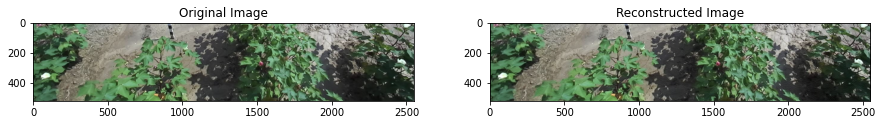

(606, 2546, 3)
(606, 100)
(606, 2546, 3)
file:  091021_s10


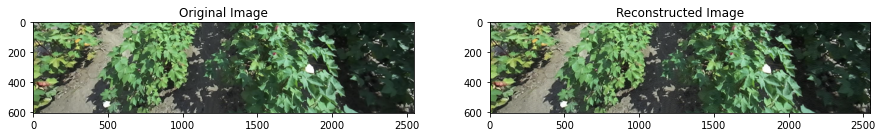

(608, 2544, 3)
(608, 100)
(608, 2544, 3)
file:  091021_s11


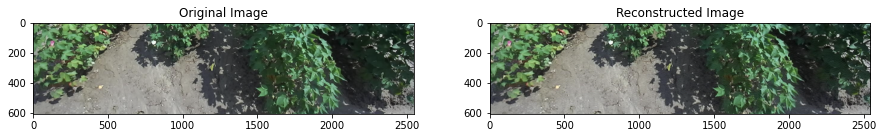

(490, 2548, 3)
(490, 100)
(490, 2548, 3)
file:  091021_s12


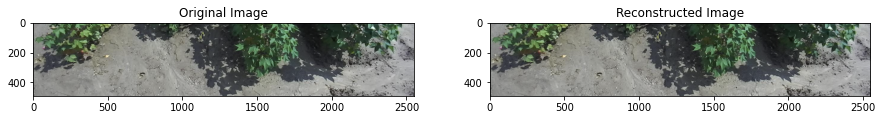

(514, 2548, 3)
(514, 100)
(514, 2548, 3)
file:  091021_s2


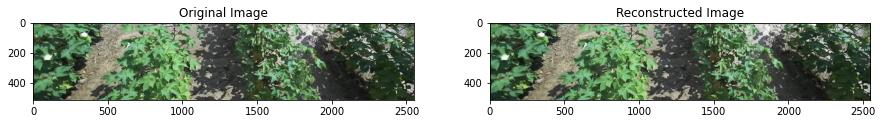

(578, 2550, 3)
(578, 100)
(578, 2550, 3)
file:  091021_s3


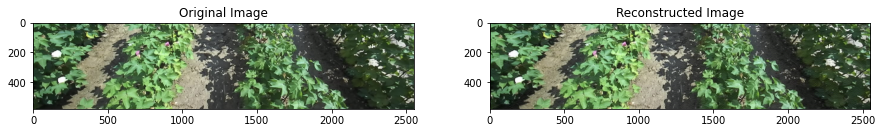

(618, 2550, 3)
(618, 100)
(618, 2550, 3)
file:  091021_s4


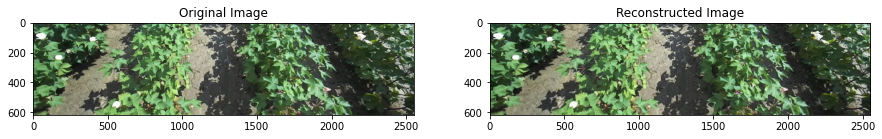

(434, 2544, 3)
(434, 100)
(434, 2544, 3)
file:  091021_s5


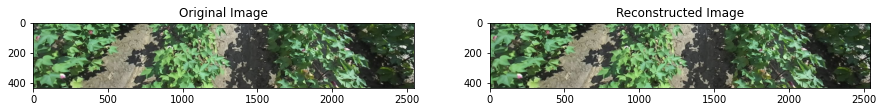

(484, 2552, 3)
(484, 100)
(484, 2552, 3)
file:  091021_s6


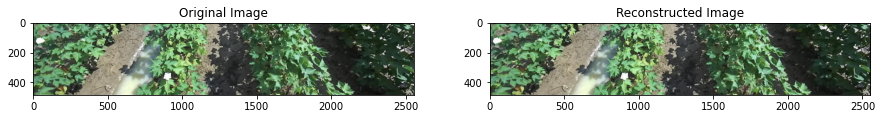

(532, 2540, 3)
(532, 100)
(532, 2540, 3)
file:  091021_s7


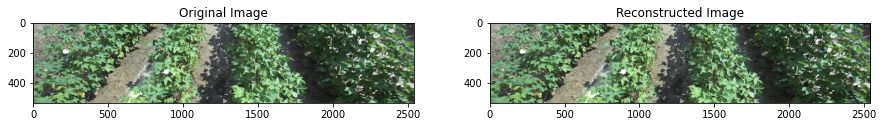

(712, 2542, 3)
(712, 100)
(712, 2542, 3)
file:  091021_s8


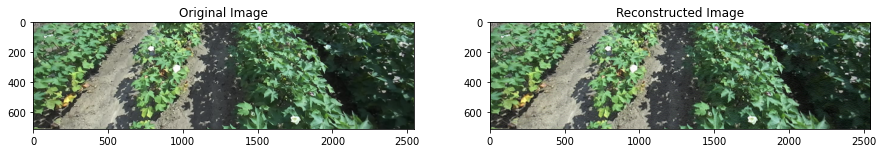

(516, 2542, 3)
(516, 100)
(516, 2542, 3)
file:  091021_s9


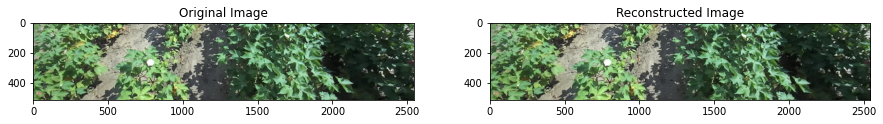

In [12]:
directory = '../Cotton_data/080421_spliced/'
reconstructions = True

pca_b = PCA(n_components=100)
pca_g = PCA(n_components=100)
pca_r = PCA(n_components=100)

blue_variance = []
green_variance = []
red_variance = []

image_byte_size = 0
components_byte_size = 0
reconstruct_byte_size = 0

listsize = 0

for filename in os.listdir(directory):
    # pca process for each image in directory
    listsize += 1
        
    f = os.path.join(directory, filename)
    img = cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB)
    print(img.shape)
    image_byte_size += img.nbytes
    blue, green, red = cv2.split(img)
    
    df_blue = blue/255
    df_green = green/255
    df_red = red/255
    
    pca_b.fit(df_blue)
    trans_pca_b = pca_b.transform(df_blue)
    pca_g.fit(df_green)
    trans_pca_g = pca_g.transform(df_green)
    pca_r.fit(df_red)
    trans_pca_r = pca_r.transform(df_red)
    
    f_no_stem = filename.split('.')[0]
    np.savez_compressed(directory[:-1]+'_compressed/pca_'+f_no_stem, b=np.float16(trans_pca_b), g=np.float16(trans_pca_g), r=np.float16(trans_pca_r))
    components_byte_size += np.float16(trans_pca_b).nbytes*3
    
    blue_variance.append(sum(pca_b.explained_variance_ratio_))
    green_variance.append(sum(pca_g.explained_variance_ratio_))
    red_variance.append(sum(pca_r.explained_variance_ratio_))
    
    print(trans_pca_b.shape)
    
    # save reconstruction
    compressed_np = np.load(directory[:-1]+'_compressed/pca_'+f_no_stem+'.npz')
        
    blue_c = compressed_np['b']
    green_c = compressed_np['g']
    red_c = compressed_np['r']

    b_arr_c = pca_b.inverse_transform(blue_c)
    g_arr_c = pca_g.inverse_transform(green_c)
    r_arr_c = pca_r.inverse_transform(red_c)

    img_reconstruct = (cv2.merge((b_arr_c, g_arr_c, r_arr_c)))
    print(img_reconstruct.shape)

    print("file: ", f_no_stem)
    
    if reconstructions:
        fig = plt.figure(figsize=(15, 7.2))
        fig.add_subplot(121)
        plt.title("Original Image")
        plt.imshow(img)
        fig.add_subplot(122)
        plt.title("Reconstructed Image")
        plt.imshow(np.clip(img_reconstruct, 0, 1))
        plt.show()
    
        plt.imsave(directory[:-1]+'_reconstructed/reconstructed'+f_no_stem+'.jpg', np.clip(img_reconstruct, 0, 1))
        recon_img = cv2.cvtColor(cv2.imread(directory[:-1]+'_reconstructed/reconstructed'+f_no_stem+'.jpg'), cv2.COLOR_BGR2RGB)
        reconstruct_byte_size += recon_img.nbytes

In [13]:
print("Images size: ", image_byte_size)
print("Components size: ", components_byte_size)
print("Reconstruction size: ", reconstruct_byte_size)
print("Percent Reduction: ", (image_byte_size-components_byte_size)/image_byte_size * 100)

Images size:  50504100
Components size:  3967200
Reconstruction size:  50504100
Percent Reduction:  92.14479616506382


In [14]:
print("Number of images in folder: ", listsize)
print("Blue variance average = ", sum(blue_variance)/listsize)
print("Green variance average = ", sum(green_variance)/listsize)
print("Red variance average = ", sum(red_variance)/listsize)

Number of images in folder:  12
Blue variance average =  0.9806297802896912
Green variance average =  0.9833451711765355
Red variance average =  0.9795621886607743


## Size Reduction

for "splices" (080621)
splice image directory size: 3.65 MB (3,834,364 bytes)

compressed (.npz) directory size: 3.21 MB (3,372,525 bytes)

splice reconstruction directory size: 1.59 MB (1,673,296 bytes)
* good news! but why so much lower? both are same dimensions and bit dpeth (24)
* maybe due to dpi resolution? (144 to 100?)

(600, 2832, 3)


Text(0, 0.5, 'Explained variance Blue')

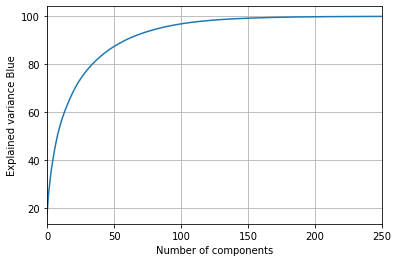

In [5]:
image_raw = imread(directory+'9_80621.jpg")
blue,green,red = cv2.split(image_raw)
print(image_raw.shape)

# normalization
df_blue = blue
df_green = green
df_red = red

#max n_components = 600
pca_b_orig = PCA(n_components=600)
pca_b_orig.fit(df_blue)

pca_g_orig = PCA(n_components=600)
pca_g_orig.fit(df_green)

pca_r_orig = PCA(n_components=600)
pca_r_orig.fit(df_red)

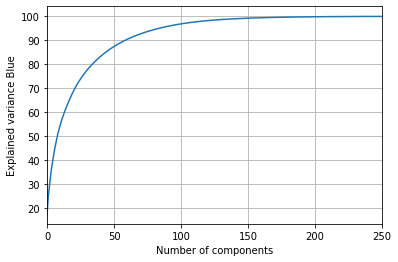

In [26]:
fig, ax = plt.subplots()
plt.grid()
plt.plot(np.cumsum(pca_b_orig.explained_variance_ratio_ * 100))
plt.xlim(0, 250)
plt.xlabel('Number of components')
plt.ylabel('Explained variance Blue')
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(10))
plt.show()

Text(0, 0.5, 'Explained variance Green')

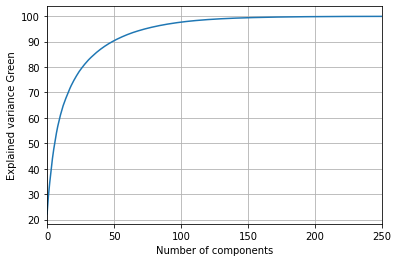

In [16]:
plt.grid()
plt.plot(np.cumsum(pca_g_orig.explained_variance_ratio_ * 100))
plt.xlim(0, 250)
plt.xlabel('Number of components')
plt.ylabel('Explained variance Green')

Text(0, 0.5, 'Explained variance Red')

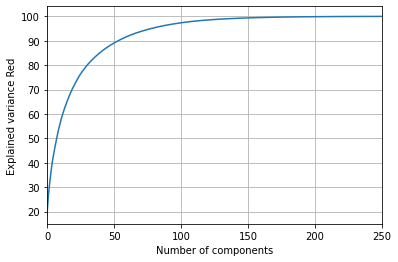

In [17]:
plt.grid()
plt.plot(np.cumsum(pca_r_orig.explained_variance_ratio_ * 100))
plt.xlim(0, 250)
plt.xlabel('Number of components')
plt.ylabel('Explained variance Red')